# Stock Price Prediction


In [3]:
!pip install yfinance scikit-learn matplotlib tensorflow

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 1.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 2.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.3/173.3 kB 913.9 kB/s eta 0:00:00 0:00:01
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15549 sha256=3f53b119fa06224c711ac33181cf5e6b4999d869e65c0927df73d1fc063cd6ab
  Stored in directory: /Users/ayshairam/Library/Caches/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.2-cp312-cp312-macosx_11_0_arm64.whl size=272179 sha256=e59b566b177fd76bdc4b3f188ab7b95a40bdcf0ec0c74b4746bf3feb1c6a4cd6
  Stored in d

In [5]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [9]:
data = yf.download('AAPL', start='2015-01-01', end='2023-12-31')
data = data[['Close']]
data.head()

/var/folders/gt/jf5bv_6x3yz87k55wq389yk40000gn/T/ipykernel_9445/1677203717.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2015-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.288580
2015-01-05,23.604330
2015-01-06,23.606556
2015-01-07,23.937574
2015-01-08,24.857309


In [11]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [13]:
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [15]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0721
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0029
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0023
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0019
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0021
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0019
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0023
Epoch 9/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0018
Epoch 10/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017
Epoch 11/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017
Epoch 12/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0019
Epoch 13/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0018
Epoch 14/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0016
Epoch 15/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017
Epoch 16/20
69/

In [17]:
last_60 = scaled_data[-60:]
last_60 = last_60.reshape(1, 60, 1)
predicted_price = model.predict(last_60)
predicted_price = scaler.inverse_transform(predicted_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [19]:
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'Next Day Predicted Price for AAPL')

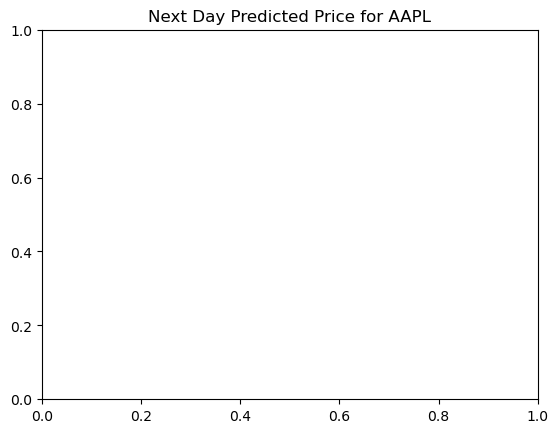

In [21]:
plt.title('Next Day Predicted Price for AAPL')

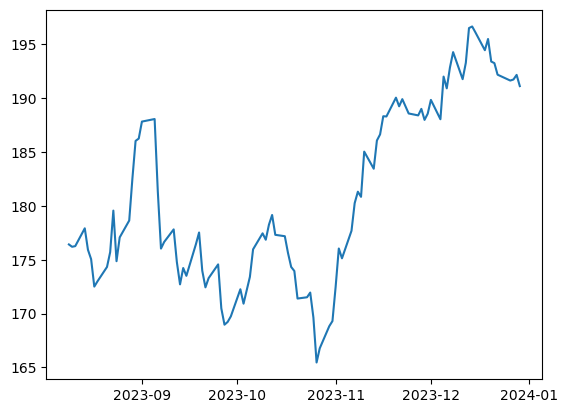

In [23]:
plt.plot(data[-100:], label='Recent Prices')

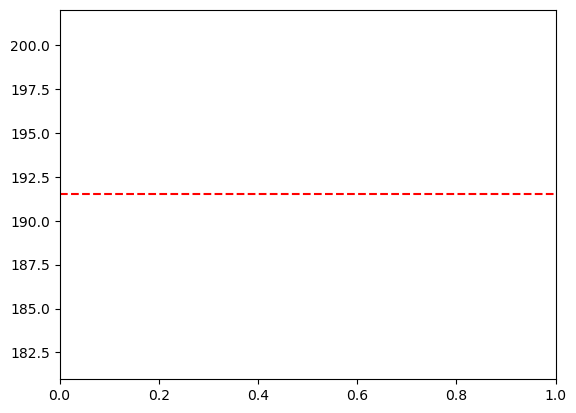

In [25]:
plt.axhline(y=predicted_price[0][0], color='red', linestyle='--', label='Predicted Next Price')

Text(0, 0.5, 'Price')

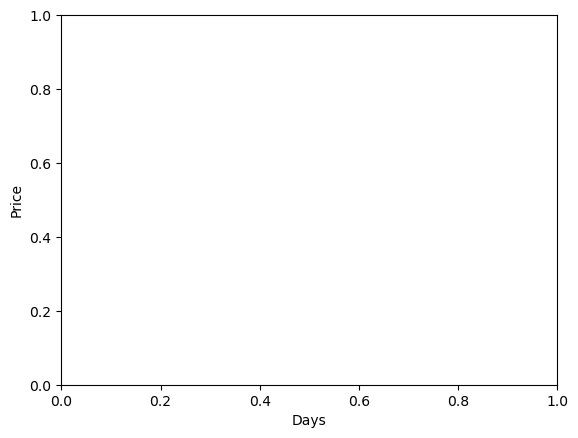

In [27]:
plt.xlabel('Days')
plt.ylabel('Price')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


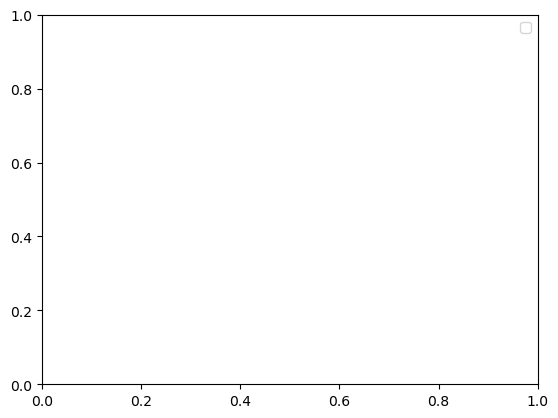

In [29]:
plt.legend()

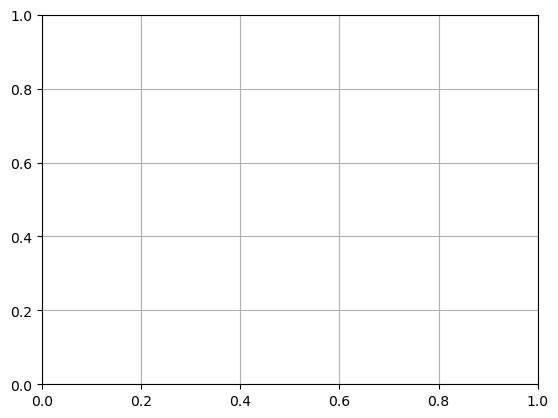

In [31]:
plt.grid()

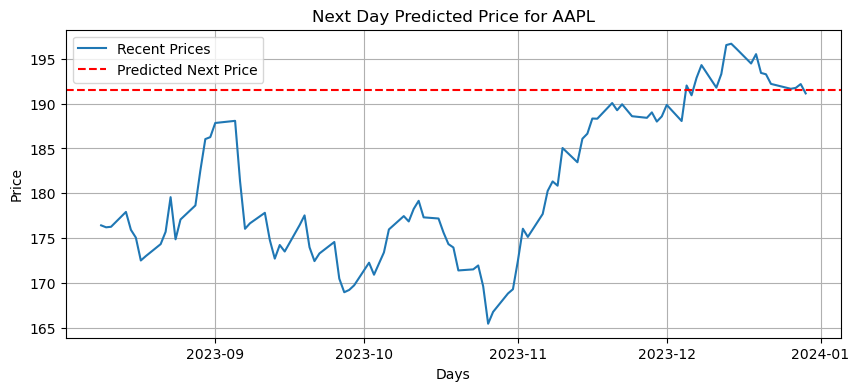

In [35]:
plt.figure(figsize=(10, 4))
plt.title('Next Day Predicted Price for AAPL')
plt.plot(data[-100:], label='Recent Prices')
plt.axhline(y=predicted_price[0][0], color='red', linestyle='--', label='Predicted Next Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()